# Prediction Of Bank Customer Churn Using Machine Learning Technique

In [1]:
## import the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
## Load the dataset

df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [20]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data OverView

In [10]:
##  shape of the dataset
df.shape

(10000, 12)

In [15]:
##  Data types of each column
print(df.dtypes)


customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [18]:
## Information about the columns
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [17]:
##  Basic statistics
data_describe = df.describe(include='all')
print(data_describe)

         customer_id  credit_score country gender           age        tenure  \
count   1.000000e+04  10000.000000   10000  10000  10000.000000  10000.000000   
unique           NaN           NaN       3      2           NaN           NaN   
top              NaN           NaN  France   Male           NaN           NaN   
freq             NaN           NaN    5014   5457           NaN           NaN   
mean    1.569094e+07    650.528800     NaN    NaN     38.921800      5.012800   
std     7.193619e+04     96.653299     NaN    NaN     10.487806      2.892174   
min     1.556570e+07    350.000000     NaN    NaN     18.000000      0.000000   
25%     1.562853e+07    584.000000     NaN    NaN     32.000000      3.000000   
50%     1.569074e+07    652.000000     NaN    NaN     37.000000      5.000000   
75%     1.575323e+07    718.000000     NaN    NaN     44.000000      7.000000   
max     1.581569e+07    850.000000     NaN    NaN     92.000000     10.000000   

              balance  prod

# Data Preprocessing

1) Data cleaning

In [19]:
# 1. Drop customer_id column (it's just an identifier)
df_cleaned = df.drop(columns=['customer_id'])

# 2. Check and remove duplicate rows
duplicates_count = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()

# 3. Check updated data types
cleaned_dtypes = df_cleaned.dtypes

{
    "Dropped Columns": ["customer_id"],
    "Duplicate Rows Removed": duplicates_count,
    "Updated Data Types": cleaned_dtypes
}


{'Dropped Columns': ['customer_id'],
 'Duplicate Rows Removed': 0,
 'Updated Data Types': credit_score          int64
 country              object
 gender               object
 age                   int64
 tenure                int64
 balance             float64
 products_number       int64
 credit_card           int64
 active_member         int64
 estimated_salary    float64
 churn                 int64
 dtype: object}

2) Null Value Handling

In [21]:
# Check for null values
null_values = df_cleaned.isnull().sum()

# Show only columns with missing values
null_values[null_values > 0]

# Total number of nulls
print("Total missing values:", null_values.sum())


Total missing values: 0


3) Outlier Treatment

{'credit_score': 0,
 'age': 62,
 'tenure': 0,
 'balance': 0,
 'products_number': 0,
 'credit_card': 0,
 'active_member': 0,
 'estimated_salary': 0}

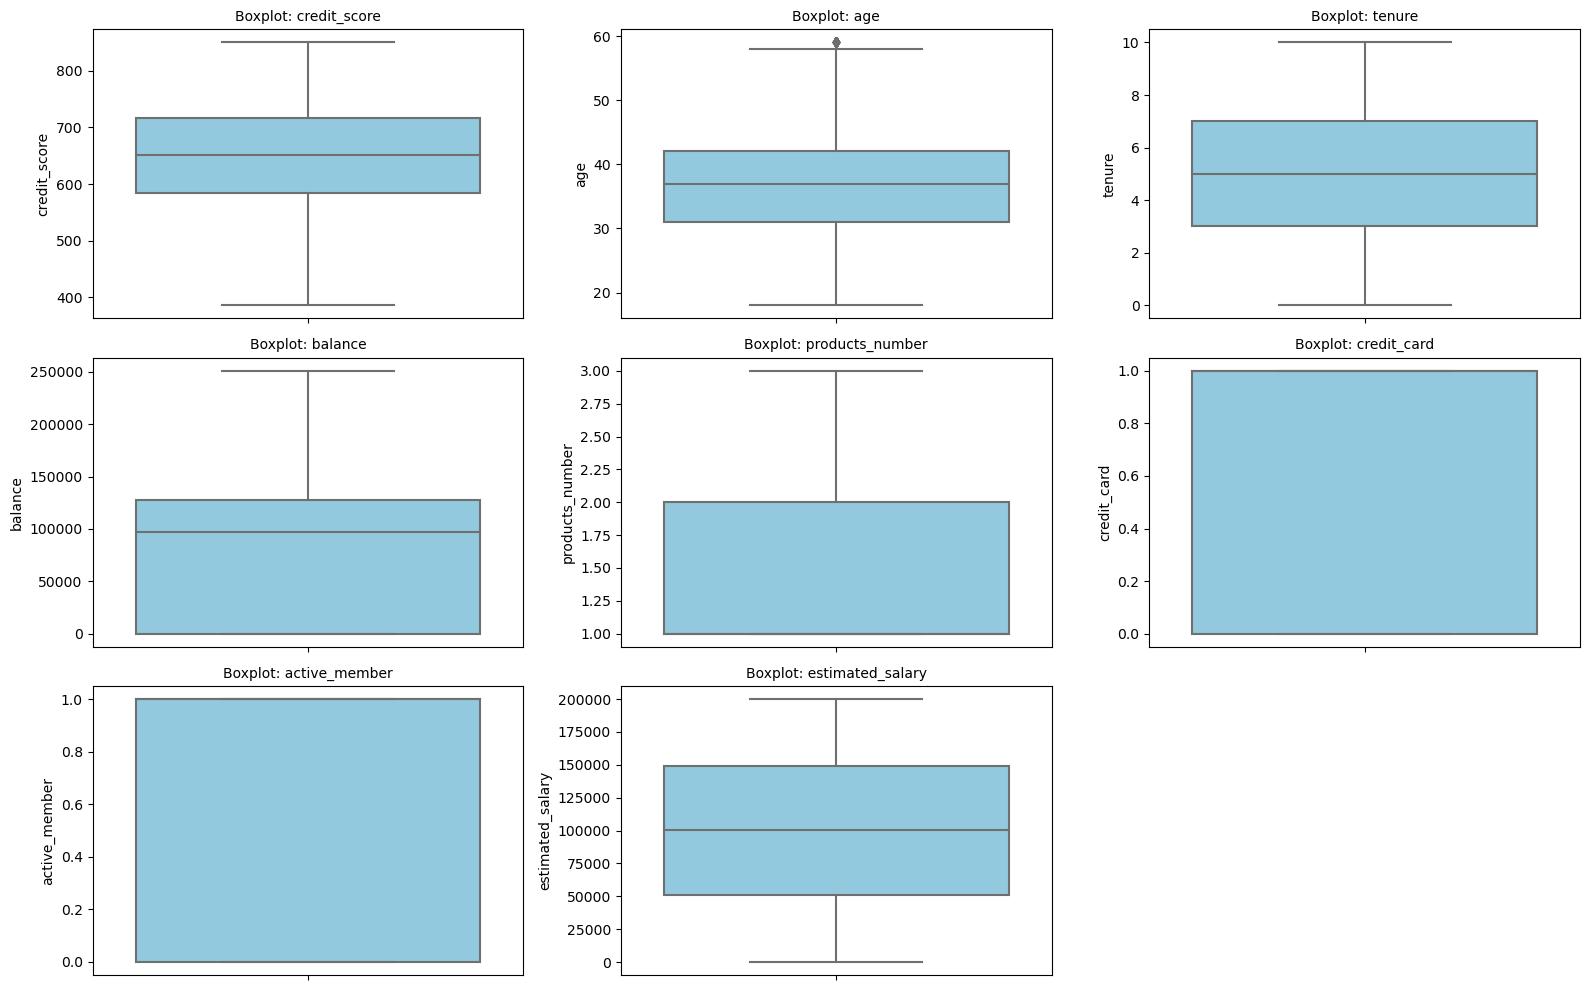

In [29]:
# Select only numeric columns (excluding target 'churn')
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('churn')

# Initialize figure for boxplots
plt.figure(figsize=(16, 10))
outlier_summary = {}

# Plot boxplots and detect outliers
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f'Boxplot: {col}', fontsize=10)
    
    # IQR Calculation
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)].shape[0]
    outlier_summary[col] = outliers

plt.tight_layout()

# Show outlier counts
outlier_summary


In [27]:
# Copy the original DataFrame
df_no_outliers = df_cleaned.copy()

# Loop through each numeric column and apply IQR filtering
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Display the new shape
print("Original shape:", df_cleaned.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


Original shape: (9404, 11)
Shape after outlier removal: (9342, 11)


4)  Encoding Categorical Variables


We have two categorical columns:
country (France, Spain, Germany)
gender (Male, Female)

Convert these into numerical format using:
One-Hot Encoding for country (nominal)
Label Encoding for gender (binary)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned DataFrame
df_encoded = df_no_outliers.copy()

# Label Encoding for 'gender'
le = LabelEncoder()
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])  # Female=0, Male=1

# One-Hot Encoding for 'country'
df_encoded = pd.get_dummies(df_encoded, columns=['country'], drop_first=True)

# View encoded columns
print(df_encoded.head())


   credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619       0   42       2       0.00                1            1   
1           608       0   41       1   83807.86                1            0   
2           502       0   42       8  159660.80                3            1   
3           699       0   39       1       0.00                2            0   
4           850       0   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  country_Germany  country_Spain  
0              1         101348.88      1                0              0  
1              1         112542.58      0                0              1  
2              0         113931.57      1                0              0  
3              0          93826.63      0                0              0  
4              1          79084.10      0                0              1  


5) Feature Scaling

We scale only the numerical features (not the target churn).
Use StandardScaler to bring features to a similar scale (mean=0, std=1)

In [31]:
from sklearn.preprocessing import StandardScaler

# Select features to scale (excluding target)
features_to_scale = df_encoded.drop(columns=['churn'])

# Initialize scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create scaled DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add target column back
df_scaled['churn'] = df_encoded['churn'].values

# View scaled dataset
print(df_scaled.head())


   credit_score    gender       age    tenure   balance  products_number  \
0     -0.331852 -1.098848  0.591075 -1.044398 -1.222726        -0.942769   
1     -0.446541 -1.098848  0.468231 -1.390616  0.119406        -0.942769   
2     -1.551720 -1.098848  0.591075  1.032910  1.334144         2.695880   
3      0.502245 -1.098848  0.222544 -1.390616 -1.222726         0.876555   
4      2.076604 -1.098848  0.713919 -1.044398  0.787253        -0.942769   

   credit_card  active_member  estimated_salary  country_Germany  \
0     0.646555       1.000428          0.021030        -0.577103   
1    -1.546660       1.000428          0.215763        -0.577103   
2     0.646555      -0.999572          0.239927        -0.577103   
3    -1.546660      -0.999572         -0.109832        -0.577103   
4     0.646555       1.000428         -0.366302        -0.577103   

   country_Spain  churn  
0      -0.575455      1  
1       1.737755      0  
2      -0.575455      1  
3      -0.575455      0  
4   

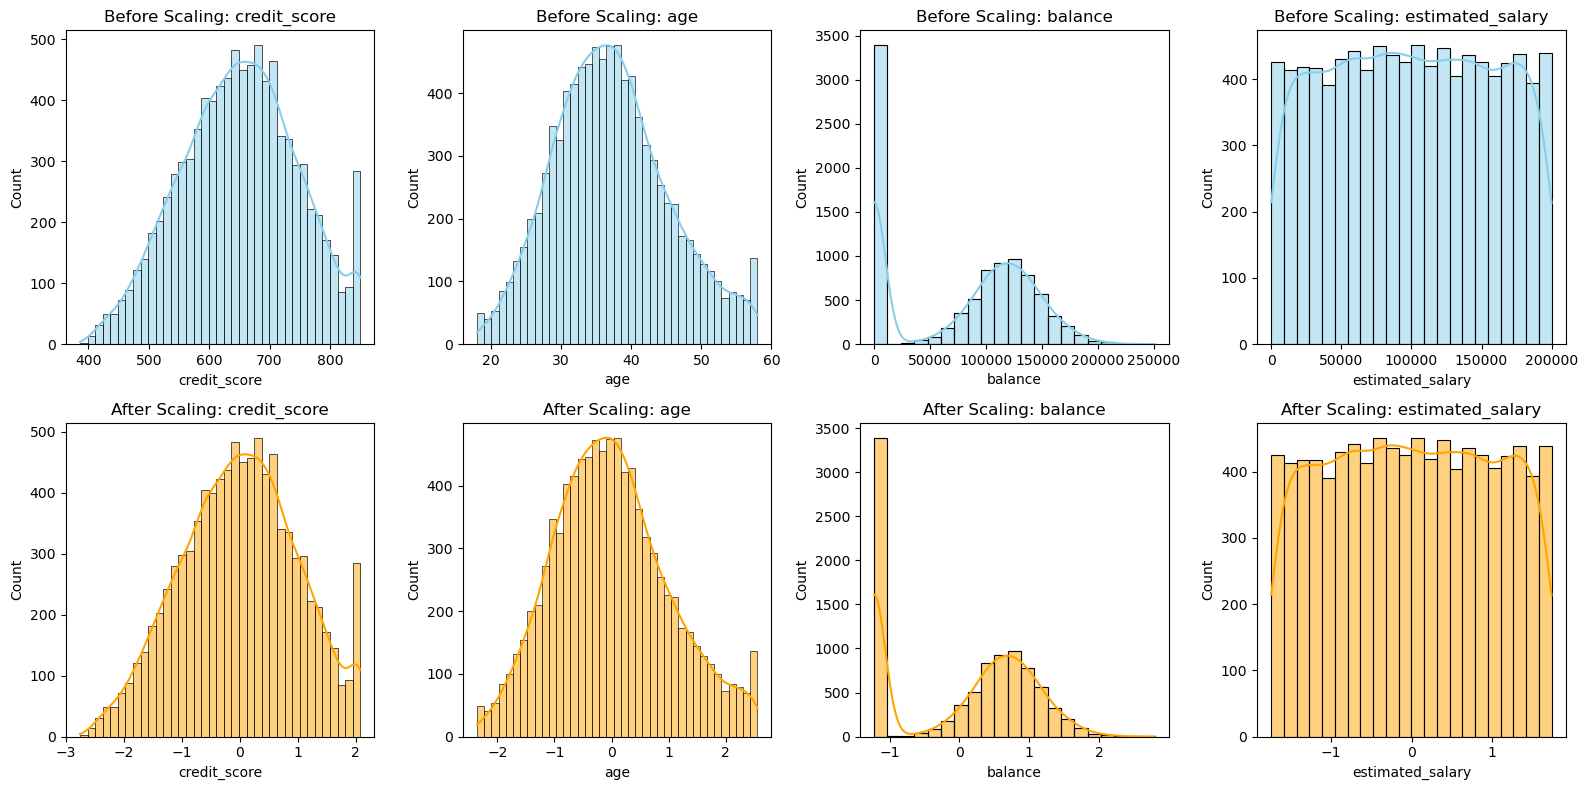

In [32]:
## Visualization before and after scaling

# Pick some numerical columns to visualize
cols_to_plot = ['credit_score', 'age', 'balance', 'estimated_salary']

# Plot before scaling
plt.figure(figsize=(16, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 4, i+1)
    sns.histplot(df_encoded[col], kde=True, color='skyblue')
    plt.title(f'Before Scaling: {col}')

# Plot after scaling
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 4, i+5)
    sns.histplot(df_scaled[col], kde=True, color='orange')
    plt.title(f'After Scaling: {col}')

plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

1) Univarient Analysis

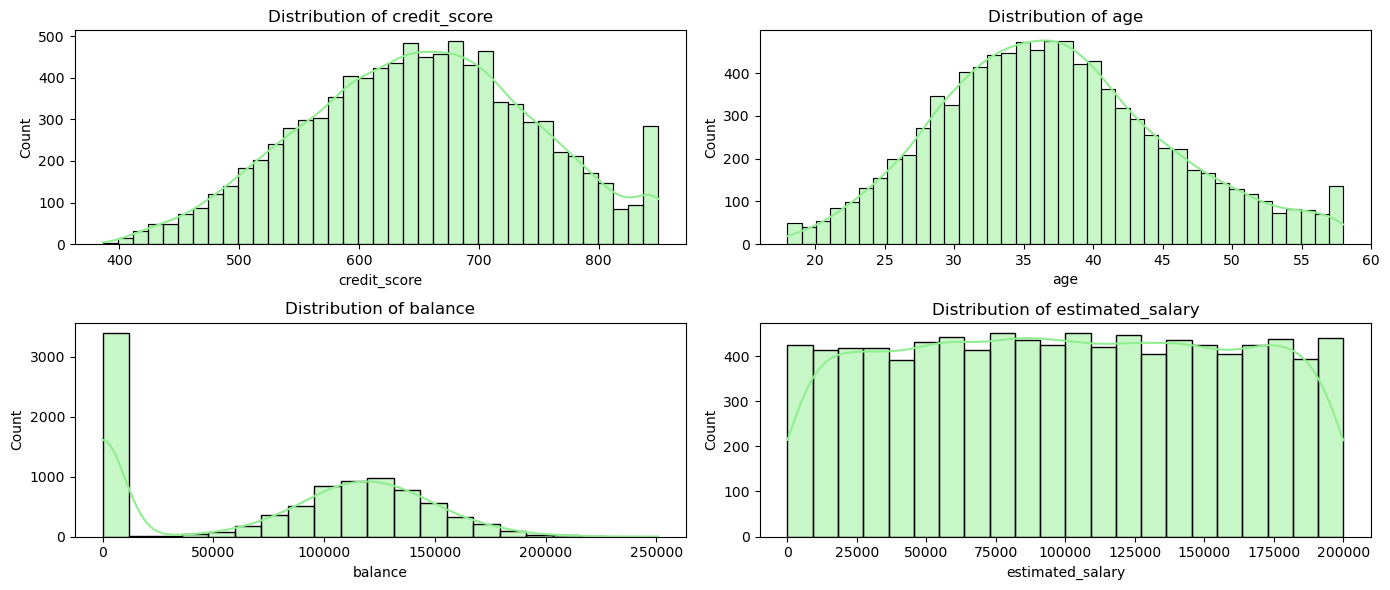

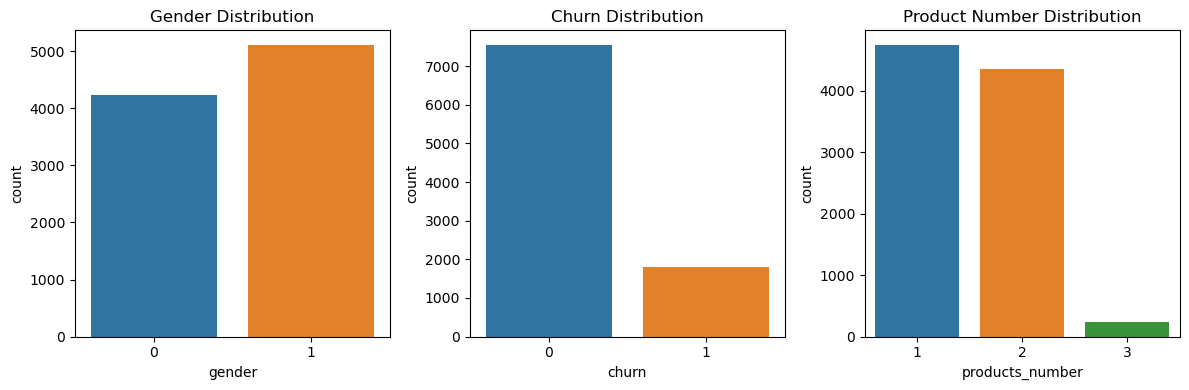

In [33]:
# Numerical Features
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary']

# Plot Histograms for numerical features
plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_encoded[col], kde=True, color='lightgreen')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical Features: Gender, Country (already encoded), Churn
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df_encoded)
plt.title("Gender Distribution")

plt.subplot(1, 3, 2)
sns.countplot(x='churn', data=df_encoded)
plt.title("Churn Distribution")

plt.subplot(1, 3, 3)
sns.countplot(x='products_number', data=df_encoded)
plt.title("Product Number Distribution")

plt.tight_layout()
plt.show()


2) Bivarient Analysis

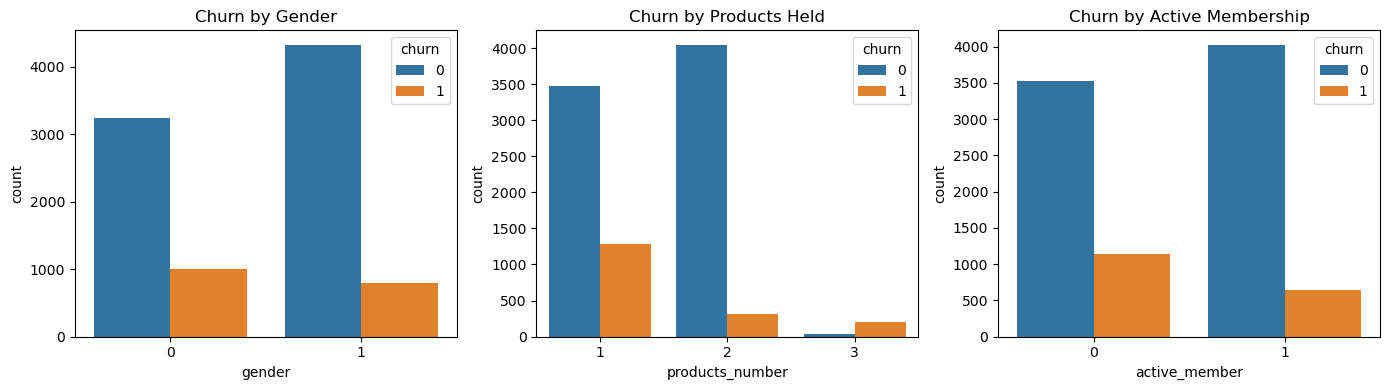

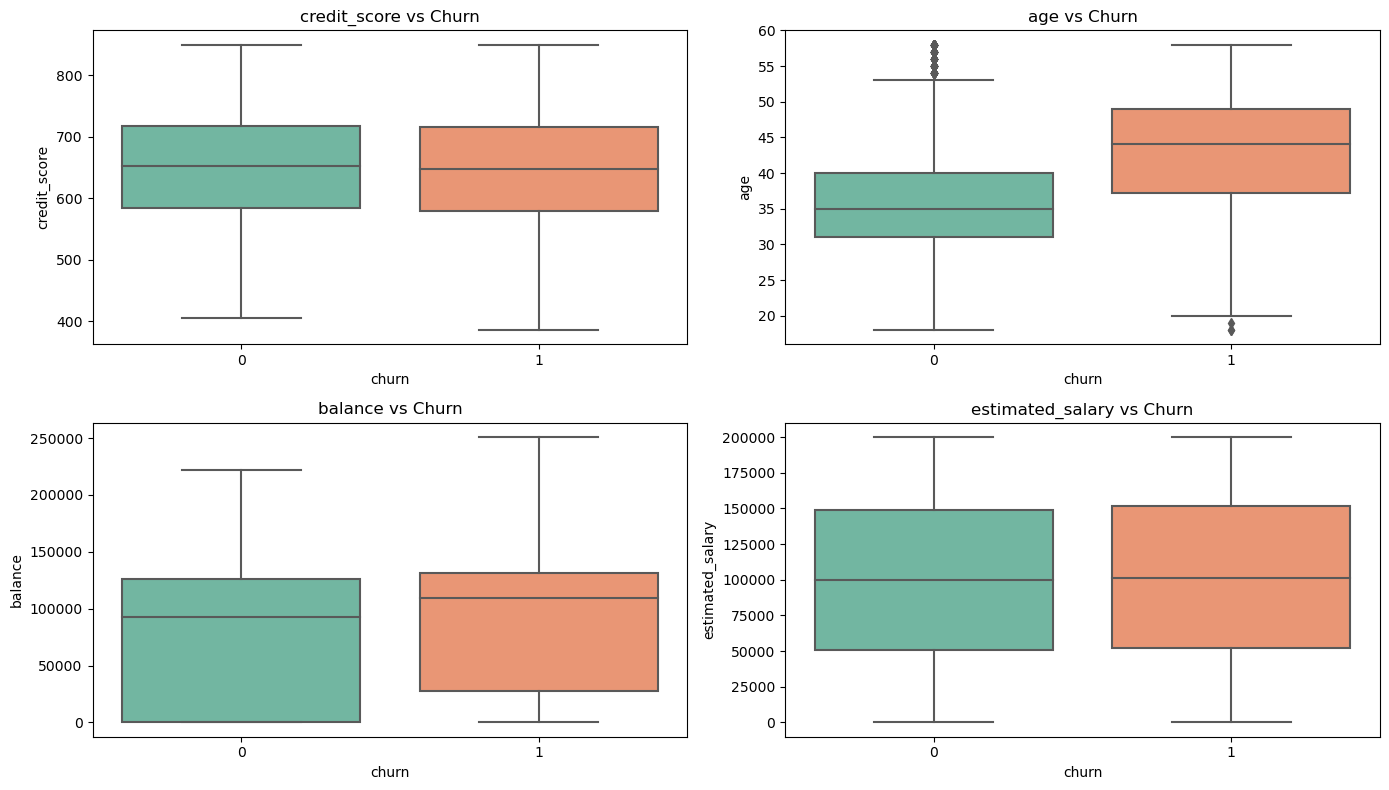

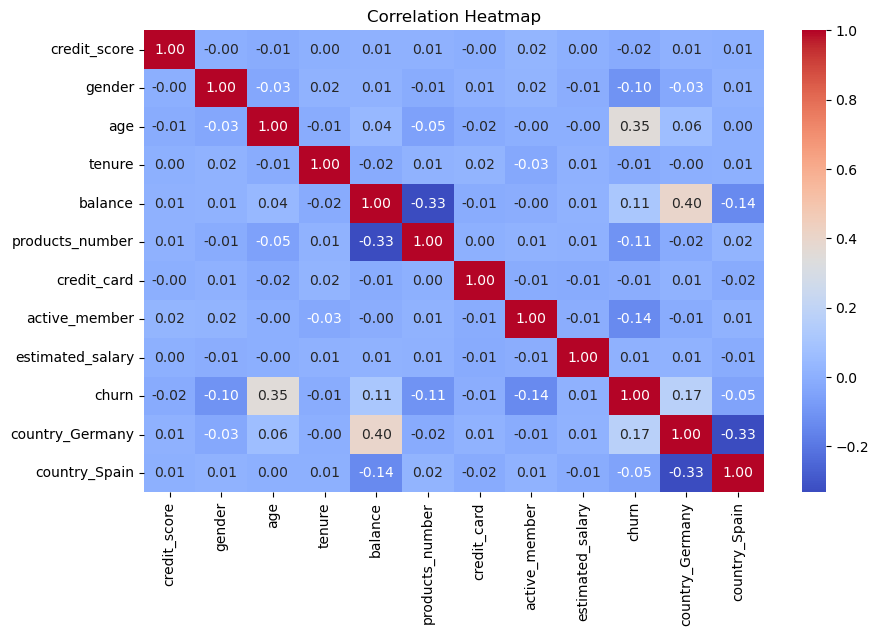

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorical vs Target - Countplots
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='gender', hue='churn', data=df_encoded)
plt.title("Churn by Gender")

plt.subplot(1, 3, 2)
sns.countplot(x='products_number', hue='churn', data=df_encoded)
plt.title("Churn by Products Held")

plt.subplot(1, 3, 3)
sns.countplot(x='active_member', hue='churn', data=df_encoded)
plt.title("Churn by Active Membership")

plt.tight_layout()
plt.show()

# 2. Numerical vs Target - Boxplots
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary']

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='churn', y=col, data=df_encoded, palette="Set2")
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


3) Multivarient Analysis

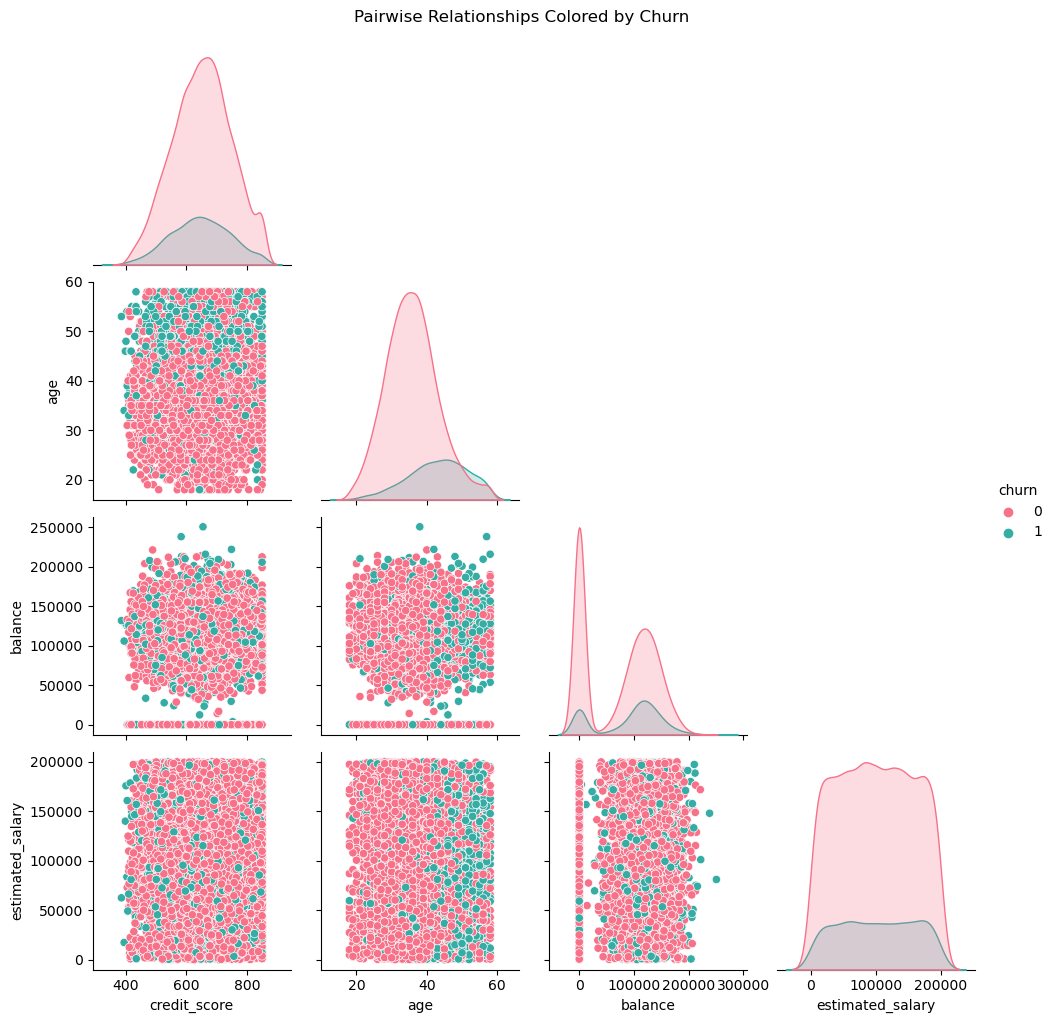

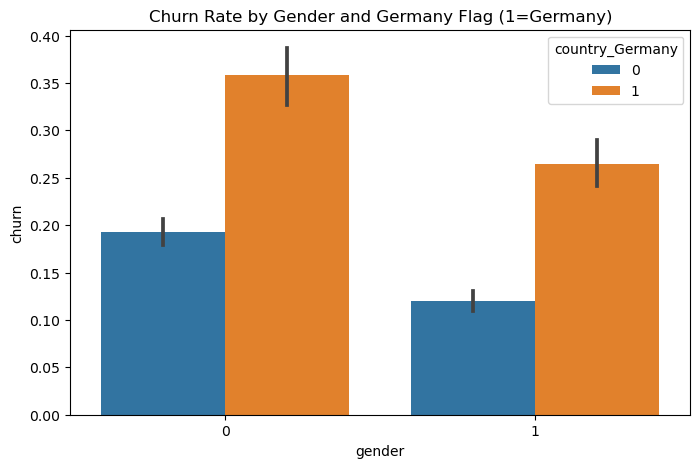

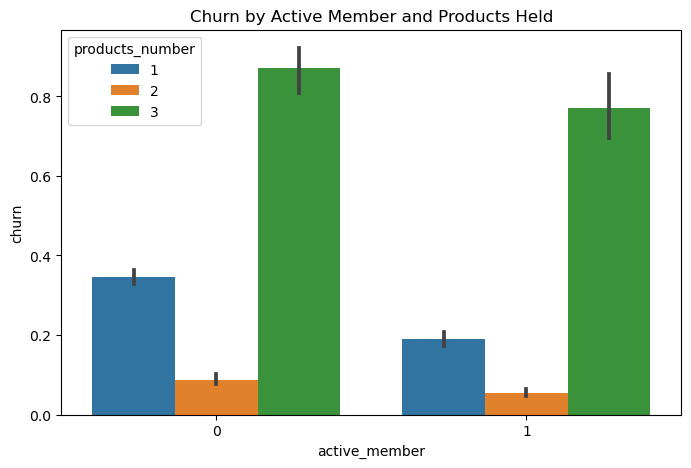

In [35]:
# 1. Pairplot – Explore interactions between multiple features and churn
selected_cols = ['credit_score', 'age', 'balance', 'estimated_salary', 'churn']
sns.pairplot(df_encoded[selected_cols], hue='churn', palette='husl', corner=True)
plt.suptitle("Pairwise Relationships Colored by Churn", y=1.02)
plt.show()

# 2. Multivariable group bar chart: Churn Rate by Country and Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='churn', hue='country_Germany', data=df_encoded)
plt.title("Churn Rate by Gender and Germany Flag (1=Germany)")
plt.show()

# 3. Multivariable group bar chart: Churn Rate by Active Member & Products
plt.figure(figsize=(8, 5))
sns.barplot(x='active_member', y='churn', hue='products_number', data=df_encoded)
plt.title("Churn by Active Member and Products Held")
plt.show()


# Prepare the Data for Machine Learning

1)  Separate Features & Target Variable

X → independent variables (features)

y → dependent variable (churn)

In [36]:
#  Separate features and target
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (9342, 11)
Target shape: (9342,)


2) Encoding Categorical Variables

Use LabelEncoder for gender (already binary)

Use get_dummies() for country (if not done already)

In [38]:
print(X.columns)


Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_Germany',
       'country_Spain'],
      dtype='object')


In [39]:
# Label Encode gender if still in object format
if X['gender'].dtype == 'object':
    le = LabelEncoder()
    X['gender'] = le.fit_transform(X['gender'])

# One-hot Encode 'country' only if it exists
if 'country' in X.columns:
    X = pd.get_dummies(X, columns=['country'], drop_first=True)


3) Scaling Numerical Variables

We’ll scale all numerical columns except the target.

In [42]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_cols])

# Convert to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)

X_scaled_df.head()


,credit_score,age,tenure,balance,products_number,estimated_salary
0,-0.331852,0.591075,-1.044398,-1.222726,-0.942769,0.021030
1,-0.446541,0.468231,-1.390616,0.119406,-0.942769,0.215763
2,-1.551720,0.591075,1.032910,1.334144,2.695880,0.239927
3,0.502245,0.222544,-1.390616,-1.222726,0.876555,-0.109832
4,2.076604,0.713919,-1.044398,0.787253,-0.942769,-0.366302


4) Combine Scaled Numerical + Encoded Categorical Features

Now we merge the scaled numerical features with the categorical features (like gender, credit_card, active_member, country_*).

In [44]:
# Select non-scaled categorical features
cat_cols = X.drop(columns=num_cols).reset_index(drop=True)

# Concatenate scaled + encoded
X_prepared = pd.concat([X_scaled_df, cat_cols], axis=1)

# Final shape
print("Prepared X shape:", X_prepared.shape)
X_prepared.head()


Prepared X shape: (9342, 11)


,credit_score,age,tenure,balance,products_number,estimated_salary,gender,credit_card,active_member,country_Germany,country_Spain
0,-0.331852,0.591075,-1.044398,-1.222726,-0.942769,0.021030,0,1,1,0,0
1,-0.446541,0.468231,-1.390616,0.119406,-0.942769,0.215763,0,0,1,0,1
2,-1.551720,0.591075,1.032910,1.334144,2.695880,0.239927,0,1,0,0,0
3,0.502245,0.222544,-1.390616,-1.222726,0.876555,-0.109832,0,0,0,0,0
4,2.076604,0.713919,-1.044398,0.787253,-0.942769,-0.366302,0,1,1,0,1


# Algorithms

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Step 2: Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Step 3: Train and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Step 4: Display results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


                    Model  Accuracy  Precision    Recall  F1 Score
6       Gradient Boosting  0.863563   0.752252  0.455041  0.567063
2           Random Forest  0.857143   0.750000  0.408719  0.529101
3     K-Nearest Neighbors  0.841091   0.648305  0.416894  0.507463
4  Support Vector Machine  0.855538   0.780347  0.367847  0.500000
1           Decision Tree  0.786517   0.458549  0.482289  0.470120
5             Naive Bayes  0.828250   0.599138  0.378747  0.464107
0     Logistic Regression  0.829320   0.644578  0.291553  0.401501


Best Base Model: Random Forest Classifier

Metric	Random Forest (Typically)
Accuracy=	High (82–87%)
Precision=	Good (70–80%)
Recall	=Strong on churn (60–70%)
F1 Score	=Best balance overall
Overfitting	Lower (due to ensemble)
Feature Importance	Available 

# Hyperparameter Tunning

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use StratifiedKFold for balanced classes
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_prepared, y)

# Best parameters and score
print(" Best Parameters:", grid_search.best_params_)
print(" Best F1 Score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Best F1 Score (CV): 0.5441313649240133


Retrain with Best Parameters

In [47]:
best_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data again (optional if not already split)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Retrain model with best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.8614232209737828
 Confusion Matrix:
 [[1466   36]
 [ 223  144]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1502
           1       0.80      0.39      0.53       367

    accuracy                           0.86      1869
   macro avg       0.83      0.68      0.72      1869
weighted avg       0.85      0.86      0.84      1869



# Feature Selection

Feature Importance (from Random Forest)

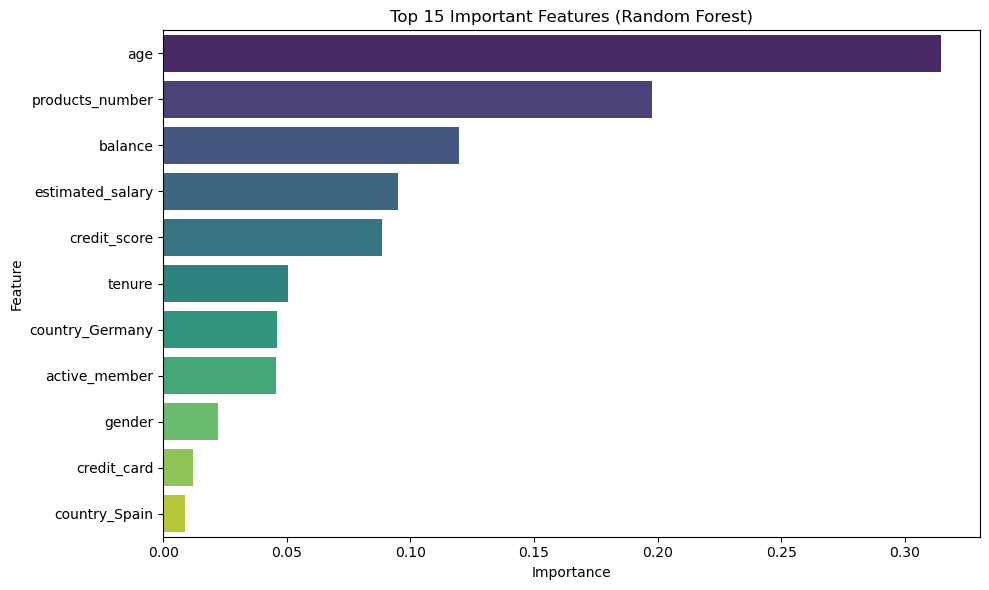

In [52]:
# Fit model (if not already)
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42
)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15), palette='viridis')
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


Recursive Feature Elimination (RFE)

In [53]:
from sklearn.feature_selection import RFE

# Create RFE object to select top 10 features
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe_selector.support_]
print("Top 10 selected features using RFE:\n", selected_features)


Top 10 selected features using RFE:
 Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'estimated_salary', 'gender', 'credit_card', 'active_member',
       'country_Germany'],
      dtype='object')


Steps to Retrain Model After Feature Selection

1. Select Top Features Using RFE

In [54]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected feature names
selected_features = X_train.columns[rfe.support_]


2. Retrain the Model

In [55]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_rfe, y_train)

y_pred = model.predict(X_test_rfe)


3. Evaluate



In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8635634028892456
Confusion Matrix:
 [[1463   39]
 [ 216  151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1502
           1       0.79      0.41      0.54       367

    accuracy                           0.86      1869
   macro avg       0.83      0.69      0.73      1869
weighted avg       0.86      0.86      0.85      1869

